In [1]:
!nvidia-smi

Fri Apr 22 22:33:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
openjdk version "11.0.14.1" 2022-02-08
OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 177.0 MB 22 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=3b78fb4ee39fd05731f9f5cb2aadaa546dfd5185902e29234d55df8721c0aa46
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [4]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp11tbczso
  JVM stdout: /tmp/tmp11tbczso/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp11tbczso/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_krp9ij
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
from h2o.automl import H2OAutoML

In [6]:
# Load telco dataset
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
churn_df.shape

(7043, 21)

In [11]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [9]:
churn_df.head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [13]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [15]:
# Split to train test valid to 70%,15%,15%
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [16]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No


In [17]:
y = "Churn"
# Remove y-output variable churn and customerID (not use for training)
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [18]:
# Max model -> max model want to use
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [19]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
22:46:53.474: Project: AutoML_1_20220422_224653
22:46:53.475: Cross-validation disabled by user: no fold column nor nfolds > 1.
22:46:53.475: Setting stopping tolerance adaptively based on the training frame: 0.014245072057454743
22:46:53.476: Build control seed: 10
22:46:53.477: training frame: Frame key: AutoML_1_20220422_224653_training_py_7_sid_93d4    cols: 21    rows: 4928  chunks: 8    size: 266217  checksum: -3583843947723629769
22:46:53.477: validation frame: Frame key: py_9_sid_93d4    cols: 21    rows: 1050  chunks: 8    size: 138753  checksum: 2531592424270615489
22:46:53.477: leaderboard frame: Frame key: py_9_sid_93d4    cols: 21    rows: 1050  chunks: 8    size: 138753  checksum: 2531592424270615489
22:46:53.488: blending frame: NULL
22:46:53.488: response column: Churn
22:46:53.488: fold column: null
22:46:53.488: weights column: null
22:46:53.570: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w

,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.004863 ),"nlambda = 30, lambda.max = 16.001, lambda.min = 0.004863, lambda.1...",45,45,36,AutoML_1_20220422_224653_training_py_7_sid_93d4




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13300868542092992
RMSE: 0.36470355827840495
LogLoss: 0.4119811294155604
Null degrees of freedom: 4927
Residual degrees of freedom: 4882
Null deviance: 5703.19588473054
Residual deviance: 4060.4860115197635
AIC: 4152.486011519763
AUC: 0.8495366381130991
AUCPR: 0.6680588106536033
Gini: 0.6990732762261982

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32766151959154843: 


,,No,Yes,Error,Rate
0,No,2884.0,736.0,0.2033,(736.0/3620.0)
1,Yes,344.0,964.0,0.263,(344.0/1308.0)
2,Total,3228.0,1700.0,0.2192,(1080.0/4928.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.327662,0.640957,207.0
1,max f2,0.150374,0.749153,297.0
2,max f0point5,0.556564,0.652357,111.0
3,max accuracy,0.533663,0.812297,122.0
4,max precision,0.864400,1.000000,0.0
5,max recall,0.009690,1.000000,395.0
6,max specificity,0.864400,1.000000,0.0
7,max absolute_mcc,0.404190,0.497475,175.0
8,max min_per_class_accuracy,0.294283,0.768785,222.0
9,max mean_per_class_accuracy,0.286178,0.770635,226.0



Gains/Lift Table: Avg response rate: 26.54 %, avg score: 26.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010146,0.794857,3.240122,3.240122,0.860000,0.820959,0.860000,0.820959,0.032875,0.032875,224.012232,224.012232,0.030941
1,2,0.020089,0.773415,3.152468,3.196738,0.836735,0.784604,0.848485,0.802966,0.031346,0.064220,215.246833,219.673802,0.060077
2,3,0.030032,0.754405,2.768021,3.054798,0.734694,0.762393,0.810811,0.789533,0.027523,0.091743,176.802097,205.479792,0.084008
3,4,0.040179,0.738844,3.240122,3.101597,0.860000,0.745910,0.823232,0.778517,0.032875,0.124618,224.012232,210.159701,0.114949
4,5,0.050122,0.725022,3.075579,3.096436,0.816327,0.732469,0.821862,0.769382,0.030581,0.155199,207.557886,209.643551,0.143044
5,6,0.100041,0.654417,2.772084,2.934589,0.735772,0.688149,0.778905,0.728848,0.138379,0.293578,177.208423,193.458883,0.263467
6,7,0.150162,0.592209,2.394780,2.754409,0.635628,0.622465,0.731081,0.693339,0.120031,0.413609,139.478018,175.440946,0.358636
7,8,0.200081,0.523817,2.128838,2.598334,0.565041,0.557296,0.689655,0.659397,0.106269,0.519878,112.883817,159.833386,0.435347
8,9,0.300122,0.386210,1.551358,2.249342,0.411765,0.451206,0.597025,0.590000,0.155199,0.675076,55.135816,124.934196,0.510436
9,10,0.399959,0.266801,1.186942,1.984146,0.315041,0.322298,0.526636,0.523176,0.118502,0.793578,18.694214,98.414627,0.535843




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.13692367525183868
RMSE: 0.37003199220045646
LogLoss: 0.4187898582510987
Null degrees of freedom: 1049
Residual degrees of freedom: 1004
Null deviance: 1209.686395413506
Residual deviance: 879.4587023273073
AIC: 971.4587023273073
AUC: 0.8420472418829344
AUCPR: 0.6308650951863848
Gini: 0.6840944837658689

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37338614322356345: 


,,No,Yes,Error,Rate
0,No,629.0,145.0,0.1873,(145.0/774.0)
1,Yes,81.0,195.0,0.2935,(81.0/276.0)
2,Total,710.0,340.0,0.2152,(226.0/1050.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.373386,0.633117,179.0
1,max f2,0.143242,0.760679,293.0
2,max f0point5,0.453885,0.625000,145.0
3,max accuracy,0.453885,0.802857,145.0
4,max precision,0.772713,0.933333,14.0
5,max recall,0.016307,1.000000,386.0
6,max specificity,0.857697,0.998708,0.0
7,max absolute_mcc,0.422624,0.493199,157.0
8,max min_per_class_accuracy,0.309925,0.754522,209.0
9,max mean_per_class_accuracy,0.194972,0.762176,259.0



Gains/Lift Table: Avg response rate: 26.29 %, avg score: 27.01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010476,0.783331,3.458498,3.458498,0.909091,0.810385,0.909091,0.810385,0.036232,0.036232,245.849802,245.849802,0.034940
1,2,0.020000,0.760314,3.043478,3.260870,0.800000,0.768008,0.857143,0.790206,0.028986,0.065217,204.347826,226.086957,0.061341
2,3,0.030476,0.747190,2.766798,3.091033,0.727273,0.754865,0.812500,0.778057,0.028986,0.094203,176.679842,209.103261,0.086451
3,4,0.040000,0.725858,2.282609,2.898551,0.600000,0.735825,0.761905,0.768002,0.021739,0.115942,128.260870,189.855072,0.103022
4,5,0.050476,0.713537,2.420949,2.799426,0.636364,0.719311,0.735849,0.757896,0.025362,0.141304,142.094862,179.942576,0.123216
5,6,0.100000,0.656845,2.633779,2.717391,0.692308,0.684911,0.714286,0.721751,0.130435,0.271739,163.377926,171.739130,0.232979
6,7,0.150476,0.595455,2.440525,2.624518,0.641509,0.627086,0.689873,0.689996,0.123188,0.394928,144.052502,162.451844,0.331620
7,8,0.200000,0.532718,2.048495,2.481884,0.538462,0.566283,0.652381,0.659362,0.101449,0.496377,104.849498,148.188406,0.402062
8,9,0.300000,0.401703,1.739130,2.234300,0.457143,0.466027,0.587302,0.594917,0.173913,0.670290,73.913043,123.429952,0.502331
9,10,0.400000,0.273618,1.086957,1.947464,0.285714,0.339471,0.511905,0.531056,0.108696,0.778986,8.695652,94.746377,0.514128




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,alpha,iterations,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-04-22 22:46:57,0.000 sec,2,.16E2,46.0,1.143994,1.138901,0.0,NaN,...,,,,,,,,,,
1,,2022-04-22 22:46:57,0.051 sec,4,.99E1,46.0,1.136362,1.131346,0.0,NaN,...,,,,,,,,,,
2,,2022-04-22 22:46:57,1.480 sec,5,None,NaN,,,,5.0,...,0.668059,3.240122,0.219156,0.370032,0.41879,0.293346,0.842047,0.630865,3.458498,0.215238
3,,2022-04-22 22:46:57,0.087 sec,6,.62E1,46.0,1.124791,1.119893,0.0,NaN,...,,,,,,,,,,
4,,2022-04-22 22:46:57,0.130 sec,8,.38E1,46.0,1.107813,1.103096,0.0,NaN,...,,,,,,,,,,
5,,2022-04-22 22:46:57,0.174 sec,10,.24E1,46.0,1.084113,1.079661,0.0,NaN,...,,,,,,,,,,
6,,2022-04-22 22:46:57,0.217 sec,12,.15E1,46.0,1.053204,1.049127,0.0,NaN,...,,,,,,,,,,
7,,2022-04-22 22:46:57,0.263 sec,14,.92E0,46.0,1.016358,1.012777,0.0,NaN,...,,,,,,,,,,
8,,2022-04-22 22:46:57,0.299 sec,16,.57E0,46.0,0.976804,0.97385,0.0,NaN,...,,,,,,,,,,
9,,2022-04-22 22:46:57,0.332 sec,18,.35E0,46.0,0.938764,0.936583,0.0,NaN,...,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,0.903768,1.000000,0.139306
1,Contract.Month-to-month,0.553185,0.612087,0.085268
2,Contract.Two year,0.471143,0.521310,0.072622
3,InternetService.Fiber optic,0.342284,0.378730,0.052759
4,InternetService.DSL,0.283962,0.314198,0.043770
5,PaymentMethod.Electronic check,0.267562,0.296052,0.041242
6,MonthlyCharges,0.254361,0.281445,0.039207
7,OnlineSecurity.No,0.243767,0.269723,0.037574
8,TechSupport.No,0.221380,0.244953,0.034123
9,OnlineSecurity.Yes,0.186383,0.206229,0.028729



See the whole table with table.as_data_frame()


In [21]:
!nvidia-smi

Fri Apr 22 22:51:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    73W / 149W |     82MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [22]:
lb = aml.leaderboard

In [23]:
# Check leaderboard for the trained models
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20220422_224653,0.842047,0.41879,0.630865,0.240408,0.370032,0.136924
GBM_1_AutoML_1_20220422_224653,0.838511,0.421896,0.646639,0.232347,0.371171,0.137768
XGBoost_3_AutoML_1_20220422_224653,0.83698,0.427321,0.654552,0.241897,0.371067,0.137691
GBM_2_AutoML_1_20220422_224653,0.832126,0.431415,0.63719,0.23892,0.374676,0.140382
XRT_1_AutoML_1_20220422_224653,0.831342,0.431044,0.621785,0.242346,0.374482,0.140237
GBM_3_AutoML_1_20220422_224653,0.830405,0.436326,0.632091,0.244495,0.376697,0.1419
XGBoost_1_AutoML_1_20220422_224653,0.82677,0.443719,0.634223,0.24031,0.380927,0.145105
GBM_4_AutoML_1_20220422_224653,0.826555,0.442263,0.636314,0.249972,0.378543,0.143295
DRF_1_AutoML_1_20220422_224653,0.824437,0.526588,0.610486,0.245506,0.379281,0.143854
XGBoost_2_AutoML_1_20220422_224653,0.81709,0.460855,0.618925,0.258356,0.385444,0.148567


In [24]:
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [25]:
churn_pred.head()

predict,No,Yes
No,0.708168,0.291832
Yes,0.333418,0.666582
No,0.97484,0.0251595
Yes,0.510163,0.489837
No,0.933013,0.0669873
No,0.831126,0.168874
Yes,0.27395,0.72605
No,0.983146,0.016854
Yes,0.385963,0.614037
Yes,0.349435,0.650565


In [27]:
# Check model performance report based on test data
aml.leader.model_performance(churn_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14271862240312652
RMSE: 0.377781183230619
LogLoss: 0.4320879085212604
Null degrees of freedom: 1064
Residual degrees of freedom: 1019
Null deviance: 1237.2637173357605
Residual deviance: 920.3472451502846
AIC: 1012.3472451502846
AUC: 0.8320512820512821
AUCPR: 0.6256721457012895
Gini: 0.6641025641025642

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2905508913716959: 


,,No,Yes,Error,Rate
0,No,582.0,198.0,0.2538,(198.0/780.0)
1,Yes,58.0,227.0,0.2035,(58.0/285.0)
2,Total,640.0,425.0,0.2404,(256.0/1065.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.290551,0.639437,220.0
1,max f2,0.136654,0.751689,294.0
2,max f0point5,0.511746,0.587262,128.0
3,max accuracy,0.596886,0.784038,88.0
4,max precision,0.864846,1.000000,0.0
5,max recall,0.019319,1.000000,383.0
6,max specificity,0.864846,1.000000,0.0
7,max absolute_mcc,0.278987,0.490817,227.0
8,max min_per_class_accuracy,0.305804,0.761538,211.0
9,max mean_per_class_accuracy,0.278987,0.773043,227.0



Gains/Lift Table: Avg response rate: 26.76 %, avg score: 27.48 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010329,0.810416,3.397129,3.397129,0.909091,0.832719,0.909091,0.832719,0.035088,0.035088,239.712919,239.712919,0.033806
1,2,0.020657,0.784433,3.397129,3.397129,0.909091,0.797910,0.909091,0.815314,0.035088,0.070175,239.712919,239.712919,0.067611
2,3,0.030047,0.767434,2.989474,3.269737,0.800000,0.773476,0.875000,0.802240,0.028070,0.098246,198.947368,226.973684,0.093117
3,4,0.040376,0.746497,3.057416,3.215422,0.818182,0.756834,0.860465,0.790624,0.031579,0.129825,205.741627,221.542228,0.122132
4,5,0.050704,0.729052,2.038278,2.975634,0.545455,0.737227,0.796296,0.779747,0.021053,0.150877,103.827751,197.563353,0.136775
5,6,0.100469,0.654149,2.256207,2.619282,0.603774,0.691055,0.700935,0.735816,0.112281,0.263158,125.620655,161.928185,0.222132
6,7,0.150235,0.590396,2.115194,2.452303,0.566038,0.617200,0.656250,0.696524,0.105263,0.368421,111.519364,145.230263,0.297908
7,8,0.200000,0.537619,1.762661,2.280702,0.471698,0.560236,0.610329,0.662612,0.087719,0.456140,76.266137,128.070175,0.349730
8,9,0.300469,0.397426,1.711264,2.090296,0.457944,0.468992,0.559375,0.597870,0.171930,0.628070,71.126414,109.029605,0.447301
9,10,0.400000,0.288564,1.692155,1.991228,0.452830,0.337603,0.532864,0.533109,0.168421,0.796491,69.215492,99.122807,0.541363


In [28]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [29]:
model_ids

['GLM_1_AutoML_1_20220422_224653',
 'GBM_1_AutoML_1_20220422_224653',
 'XGBoost_3_AutoML_1_20220422_224653',
 'GBM_2_AutoML_1_20220422_224653',
 'XRT_1_AutoML_1_20220422_224653',
 'GBM_3_AutoML_1_20220422_224653',
 'XGBoost_1_AutoML_1_20220422_224653',
 'GBM_4_AutoML_1_20220422_224653',
 'DRF_1_AutoML_1_20220422_224653',
 'XGBoost_2_AutoML_1_20220422_224653']

In [32]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220422_224653


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10223836192904114
RMSE: 0.31974734076930356
LogLoss: 0.3250390549940185
Mean Per-Class Error: 0.16285332927838886
AUC: 0.9161253738151959
AUCPR: 0.8020398251324008
Gini: 0.8322507476303918

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.361367556181821: 


,,No,Yes,Error,Rate
0,No,3119.0,501.0,0.1384,(501.0/3620.0)
1,Yes,245.0,1063.0,0.1873,(245.0/1308.0)
2,Total,3364.0,1564.0,0.1514,(746.0/4928.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.361368,0.740251,208.0
1,max f2,0.227712,0.813097,264.0
2,max f0point5,0.553904,0.745666,131.0
3,max accuracy,0.424448,0.857752,181.0
4,max precision,0.959723,1.000000,0.0
5,max recall,0.011413,1.000000,388.0
6,max specificity,0.959723,1.000000,0.0
7,max absolute_mcc,0.410170,0.639955,187.0
8,max min_per_class_accuracy,0.324956,0.837293,223.0
9,max mean_per_class_accuracy,0.307241,0.839483,230.0



Gains/Lift Table: Avg response rate: 26.54 %, avg score: 26.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010146,0.918650,3.692232,3.692232,0.980000,0.930052,0.980000,0.930052,0.037462,0.037462,269.223242,269.223242,0.037186
1,2,0.020089,0.889113,3.690695,3.691471,0.979592,0.903589,0.979798,0.916954,0.036697,0.074159,269.069463,269.147129,0.073607
2,3,0.030438,0.862384,3.545962,3.641998,0.941176,0.875540,0.966667,0.902873,0.036697,0.110856,254.596150,264.199796,0.109475
3,4,0.040179,0.844501,3.532110,3.615358,0.937500,0.852743,0.959596,0.890720,0.034404,0.145260,253.211009,261.535848,0.143050
4,5,0.050122,0.815511,3.152468,3.523530,0.836735,0.830174,0.935223,0.878709,0.031346,0.176606,215.246833,252.353007,0.172186
5,6,0.100041,0.711319,3.231546,3.377834,0.857724,0.761951,0.896552,0.820449,0.161315,0.337920,223.154571,237.783402,0.323832
6,7,0.150162,0.621815,2.745608,3.166807,0.728745,0.666739,0.840541,0.769143,0.137615,0.475535,174.560784,216.680717,0.442938
7,8,0.200081,0.535492,2.435146,2.984263,0.646341,0.580528,0.792089,0.722085,0.121560,0.597095,143.514582,198.426286,0.540465
8,9,0.300122,0.383901,1.895255,2.621260,0.503043,0.460520,0.695740,0.634897,0.189602,0.786697,89.525529,162.126034,0.662388
9,10,0.399959,0.254835,1.033788,2.224996,0.274390,0.315157,0.590563,0.555083,0.103211,0.889908,3.378832,122.499639,0.666980




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1376905493376227
RMSE: 0.371066772074276
LogLoss: 0.42732107120087937
Mean Per-Class Error: 0.24189697786765532
AUC: 0.8369799273489871
AUCPR: 0.6545519441742128
Gini: 0.6739598546979741

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24807579815387726: 


,,No,Yes,Error,Rate
0,No,565.0,209.0,0.27,(209.0/774.0)
1,Yes,59.0,217.0,0.2138,(59.0/276.0)
2,Total,624.0,426.0,0.2552,(268.0/1050.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.248076,0.618234,238.0
1,max f2,0.080752,0.743166,324.0
2,max f0point5,0.576385,0.652174,116.0
3,max accuracy,0.576385,0.813333,116.0
4,max precision,0.956897,1.000000,0.0
5,max recall,0.006338,1.000000,392.0
6,max specificity,0.956897,1.000000,0.0
7,max absolute_mcc,0.552293,0.476304,121.0
8,max min_per_class_accuracy,0.295814,0.750000,223.0
9,max mean_per_class_accuracy,0.236686,0.759016,242.0



Gains/Lift Table: Avg response rate: 26.29 %, avg score: 26.42 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010476,0.919690,3.112648,3.112648,0.818182,0.930828,0.818182,0.930828,0.032609,0.032609,211.264822,211.264822,0.030025
1,2,0.020000,0.880986,3.804348,3.442029,1.000000,0.896879,0.904762,0.914662,0.036232,0.068841,280.434783,244.202899,0.066257
2,3,0.030476,0.860230,2.766798,3.209918,0.727273,0.872351,0.843750,0.900117,0.028986,0.097826,176.679842,220.991848,0.091366
3,4,0.040000,0.841211,3.043478,3.170290,0.800000,0.851110,0.833333,0.888449,0.028986,0.126812,204.347826,217.028986,0.117768
4,5,0.050476,0.811583,3.112648,3.158326,0.818182,0.825953,0.830189,0.875478,0.032609,0.159420,211.264822,215.832650,0.147792
5,6,0.100000,0.710208,2.633779,2.898551,0.692308,0.760968,0.761905,0.818768,0.130435,0.289855,163.377926,189.855072,0.257555
6,7,0.150476,0.622719,2.655865,2.817144,0.698113,0.663941,0.740506,0.766832,0.134058,0.423913,165.586546,181.714364,0.370941
7,8,0.200000,0.527755,1.829013,2.572464,0.480769,0.574170,0.676190,0.719126,0.090580,0.514493,82.901338,157.246377,0.426637
8,9,0.300000,0.378191,1.340580,2.161836,0.352381,0.451998,0.568254,0.630083,0.134058,0.648551,34.057971,116.183575,0.472840
9,10,0.400000,0.253620,1.268116,1.938406,0.333333,0.322075,0.509524,0.553081,0.126812,0.775362,26.811594,93.840580,0.509212




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-04-22 22:47:11,0.004 sec,0.0,0.500000,0.693147,0.500000,0.265422,1.000000,0.734578,0.500000,0.693147,0.500000,0.262857,1.000000,0.737143
1,,2022-04-22 22:47:11,0.112 sec,5.0,0.361975,0.420761,0.871401,0.705266,3.290003,0.186282,0.376846,0.446323,0.837137,0.641887,3.804348,0.249524
2,,2022-04-22 22:47:12,0.208 sec,10.0,0.345666,0.377133,0.883122,0.733056,3.390826,0.188312,0.368965,0.421255,0.839948,0.655223,3.487319,0.218095
3,,2022-04-22 22:47:12,0.309 sec,15.0,0.340128,0.363595,0.890099,0.746082,3.545962,0.177354,0.368344,0.420480,0.839627,0.655599,3.458498,0.225714
4,,2022-04-22 22:47:12,0.414 sec,20.0,0.335049,0.353873,0.896101,0.760942,3.692232,0.163352,0.369602,0.422867,0.838965,0.649814,3.112648,0.221905
5,,2022-04-22 22:47:12,0.532 sec,25.0,0.329834,0.343590,0.903330,0.775762,3.616881,0.154018,0.369942,0.423872,0.839178,0.650212,3.112648,0.238095
6,,2022-04-22 22:47:12,0.672 sec,30.0,0.324140,0.333154,0.910992,0.789542,3.692232,0.155032,0.370429,0.425407,0.838064,0.651609,3.112648,0.222857
7,,2022-04-22 22:47:12,0.780 sec,35.0,0.319747,0.325039,0.916125,0.802040,3.692232,0.151380,0.371067,0.427321,0.836980,0.654552,3.112648,0.255238



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,1039.753540,1.000000,0.246184
1,MonthlyCharges,683.916321,0.657768,0.161932
2,Contract.Month-to-month,669.884399,0.644272,0.158610
3,TotalCharges,333.183960,0.320445,0.078889
4,TechSupport.No,263.840210,0.253753,0.062470
5,PaymentMethod.Electronic check,118.538017,0.114006,0.028066
6,OnlineSecurity.No,117.327797,0.112842,0.027780
7,InternetService.DSL,101.946960,0.098049,0.024138
8,InternetService.Fiber optic,70.526634,0.067830,0.016699
9,PaperlessBilling.No,66.925156,0.064366,0.015846



See the whole table with table.as_data_frame()


In [33]:
out = h2o.get_model([mid for mid in model_ids if "GLM" in mid][0])

In [34]:
out.params

{'HGLM': {'actual': False, 'default': False, 'input': False},
 'alpha': {'actual': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
  'default': None,
  'input': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]},
 'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'balance_classes': {'actual': False, 'default': False, 'input': False},
 'beta_constraints': {'actual': None, 'default': None, 'input': None},
 'beta_epsilon': {'actual': 0.0001, 'default': 0.0001, 'input': 0.0001},
 'calc_like': {'actual': False, 'default': False, 'input': False},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'class_sampling_factors': {'actual': None, 'default': None, 'input': None},
 'cold_start': {'actual': False, 'default': False, 'input': False},
 'compute_p_values': {'actual': False, 'default': False, 'input': False},
 'custom_metric_func': {'actual': None, 'default': None, 'input': None},
 'early_stopping': {'actual': True, 'default': True, 'input': True},
 'export_checkpoints_dir': {'actual': None,

In [35]:
# Convert H2o param to XGBoost param
out.convert_H2OXGBoostParams_2_XGBoostParams()

AttributeError: ignored

In [36]:
out

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_1_20220422_224653


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.004863 ),"nlambda = 30, lambda.max = 16.001, lambda.min = 0.004863, lambda.1...",45,45,36,AutoML_1_20220422_224653_training_py_7_sid_93d4




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13300868542092992
RMSE: 0.36470355827840495
LogLoss: 0.4119811294155604
Null degrees of freedom: 4927
Residual degrees of freedom: 4882
Null deviance: 5703.19588473054
Residual deviance: 4060.4860115197635
AIC: 4152.486011519763
AUC: 0.8495366381130991
AUCPR: 0.6680588106536033
Gini: 0.6990732762261982

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32766151959154843: 


,,No,Yes,Error,Rate
0,No,2884.0,736.0,0.2033,(736.0/3620.0)
1,Yes,344.0,964.0,0.263,(344.0/1308.0)
2,Total,3228.0,1700.0,0.2192,(1080.0/4928.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.327662,0.640957,207.0
1,max f2,0.150374,0.749153,297.0
2,max f0point5,0.556564,0.652357,111.0
3,max accuracy,0.533663,0.812297,122.0
4,max precision,0.864400,1.000000,0.0
5,max recall,0.009690,1.000000,395.0
6,max specificity,0.864400,1.000000,0.0
7,max absolute_mcc,0.404190,0.497475,175.0
8,max min_per_class_accuracy,0.294283,0.768785,222.0
9,max mean_per_class_accuracy,0.286178,0.770635,226.0



Gains/Lift Table: Avg response rate: 26.54 %, avg score: 26.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010146,0.794857,3.240122,3.240122,0.860000,0.820959,0.860000,0.820959,0.032875,0.032875,224.012232,224.012232,0.030941
1,2,0.020089,0.773415,3.152468,3.196738,0.836735,0.784604,0.848485,0.802966,0.031346,0.064220,215.246833,219.673802,0.060077
2,3,0.030032,0.754405,2.768021,3.054798,0.734694,0.762393,0.810811,0.789533,0.027523,0.091743,176.802097,205.479792,0.084008
3,4,0.040179,0.738844,3.240122,3.101597,0.860000,0.745910,0.823232,0.778517,0.032875,0.124618,224.012232,210.159701,0.114949
4,5,0.050122,0.725022,3.075579,3.096436,0.816327,0.732469,0.821862,0.769382,0.030581,0.155199,207.557886,209.643551,0.143044
5,6,0.100041,0.654417,2.772084,2.934589,0.735772,0.688149,0.778905,0.728848,0.138379,0.293578,177.208423,193.458883,0.263467
6,7,0.150162,0.592209,2.394780,2.754409,0.635628,0.622465,0.731081,0.693339,0.120031,0.413609,139.478018,175.440946,0.358636
7,8,0.200081,0.523817,2.128838,2.598334,0.565041,0.557296,0.689655,0.659397,0.106269,0.519878,112.883817,159.833386,0.435347
8,9,0.300122,0.386210,1.551358,2.249342,0.411765,0.451206,0.597025,0.590000,0.155199,0.675076,55.135816,124.934196,0.510436
9,10,0.399959,0.266801,1.186942,1.984146,0.315041,0.322298,0.526636,0.523176,0.118502,0.793578,18.694214,98.414627,0.535843




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.13692367525183868
RMSE: 0.37003199220045646
LogLoss: 0.4187898582510987
Null degrees of freedom: 1049
Residual degrees of freedom: 1004
Null deviance: 1209.686395413506
Residual deviance: 879.4587023273073
AIC: 971.4587023273073
AUC: 0.8420472418829344
AUCPR: 0.6308650951863848
Gini: 0.6840944837658689

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37338614322356345: 


,,No,Yes,Error,Rate
0,No,629.0,145.0,0.1873,(145.0/774.0)
1,Yes,81.0,195.0,0.2935,(81.0/276.0)
2,Total,710.0,340.0,0.2152,(226.0/1050.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.373386,0.633117,179.0
1,max f2,0.143242,0.760679,293.0
2,max f0point5,0.453885,0.625000,145.0
3,max accuracy,0.453885,0.802857,145.0
4,max precision,0.772713,0.933333,14.0
5,max recall,0.016307,1.000000,386.0
6,max specificity,0.857697,0.998708,0.0
7,max absolute_mcc,0.422624,0.493199,157.0
8,max min_per_class_accuracy,0.309925,0.754522,209.0
9,max mean_per_class_accuracy,0.194972,0.762176,259.0



Gains/Lift Table: Avg response rate: 26.29 %, avg score: 27.01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010476,0.783331,3.458498,3.458498,0.909091,0.810385,0.909091,0.810385,0.036232,0.036232,245.849802,245.849802,0.034940
1,2,0.020000,0.760314,3.043478,3.260870,0.800000,0.768008,0.857143,0.790206,0.028986,0.065217,204.347826,226.086957,0.061341
2,3,0.030476,0.747190,2.766798,3.091033,0.727273,0.754865,0.812500,0.778057,0.028986,0.094203,176.679842,209.103261,0.086451
3,4,0.040000,0.725858,2.282609,2.898551,0.600000,0.735825,0.761905,0.768002,0.021739,0.115942,128.260870,189.855072,0.103022
4,5,0.050476,0.713537,2.420949,2.799426,0.636364,0.719311,0.735849,0.757896,0.025362,0.141304,142.094862,179.942576,0.123216
5,6,0.100000,0.656845,2.633779,2.717391,0.692308,0.684911,0.714286,0.721751,0.130435,0.271739,163.377926,171.739130,0.232979
6,7,0.150476,0.595455,2.440525,2.624518,0.641509,0.627086,0.689873,0.689996,0.123188,0.394928,144.052502,162.451844,0.331620
7,8,0.200000,0.532718,2.048495,2.481884,0.538462,0.566283,0.652381,0.659362,0.101449,0.496377,104.849498,148.188406,0.402062
8,9,0.300000,0.401703,1.739130,2.234300,0.457143,0.466027,0.587302,0.594917,0.173913,0.670290,73.913043,123.429952,0.502331
9,10,0.400000,0.273618,1.086957,1.947464,0.285714,0.339471,0.511905,0.531056,0.108696,0.778986,8.695652,94.746377,0.514128




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,alpha,iterations,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-04-22 22:46:57,0.000 sec,2,.16E2,46.0,1.143994,1.138901,0.0,NaN,...,,,,,,,,,,
1,,2022-04-22 22:46:57,0.051 sec,4,.99E1,46.0,1.136362,1.131346,0.0,NaN,...,,,,,,,,,,
2,,2022-04-22 22:46:57,1.480 sec,5,None,NaN,,,,5.0,...,0.668059,3.240122,0.219156,0.370032,0.41879,0.293346,0.842047,0.630865,3.458498,0.215238
3,,2022-04-22 22:46:57,0.087 sec,6,.62E1,46.0,1.124791,1.119893,0.0,NaN,...,,,,,,,,,,
4,,2022-04-22 22:46:57,0.130 sec,8,.38E1,46.0,1.107813,1.103096,0.0,NaN,...,,,,,,,,,,
5,,2022-04-22 22:46:57,0.174 sec,10,.24E1,46.0,1.084113,1.079661,0.0,NaN,...,,,,,,,,,,
6,,2022-04-22 22:46:57,0.217 sec,12,.15E1,46.0,1.053204,1.049127,0.0,NaN,...,,,,,,,,,,
7,,2022-04-22 22:46:57,0.263 sec,14,.92E0,46.0,1.016358,1.012777,0.0,NaN,...,,,,,,,,,,
8,,2022-04-22 22:46:57,0.299 sec,16,.57E0,46.0,0.976804,0.97385,0.0,NaN,...,,,,,,,,,,
9,,2022-04-22 22:46:57,0.332 sec,18,.35E0,46.0,0.938764,0.936583,0.0,NaN,...,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,0.903768,1.000000,0.139306
1,Contract.Month-to-month,0.553185,0.612087,0.085268
2,Contract.Two year,0.471143,0.521310,0.072622
3,InternetService.Fiber optic,0.342284,0.378730,0.052759
4,InternetService.DSL,0.283962,0.314198,0.043770
5,PaymentMethod.Electronic check,0.267562,0.296052,0.041242
6,MonthlyCharges,0.254361,0.281445,0.039207
7,OnlineSecurity.No,0.243767,0.269723,0.037574
8,TechSupport.No,0.221380,0.244953,0.034123
9,OnlineSecurity.Yes,0.186383,0.206229,0.028729



See the whole table with table.as_data_frame()


In [37]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [44]:
out_xgboost = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

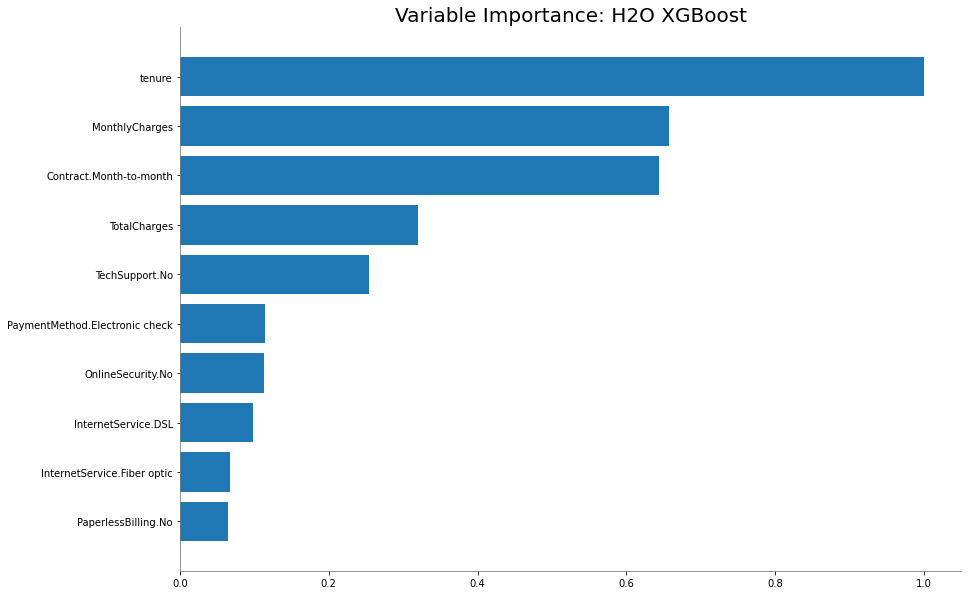

<Figure size 432x288 with 0 Axes>

In [45]:
out_xgboost.varimp_plot()

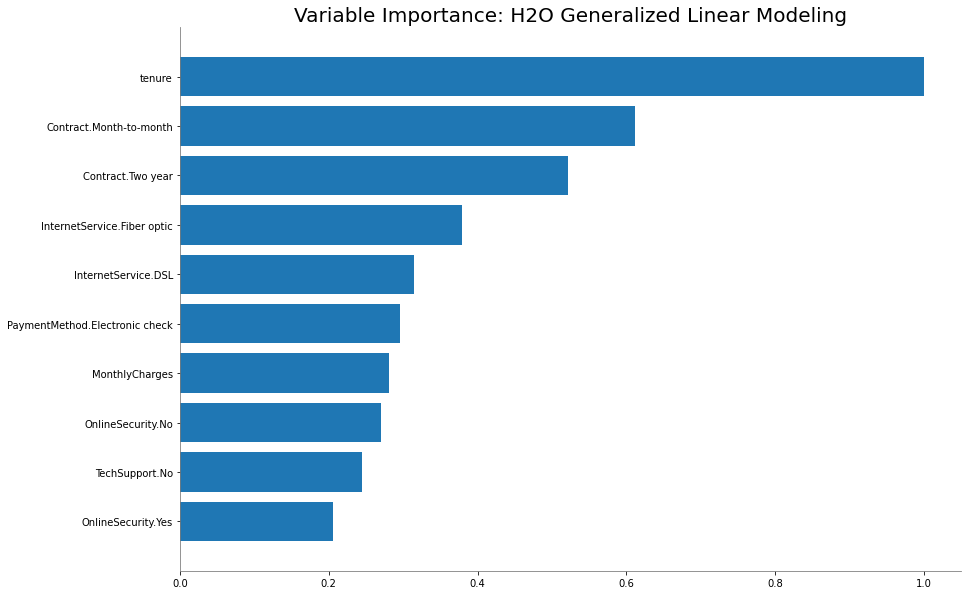

<Figure size 432x288 with 0 Axes>

In [38]:
out.varimp_plot()

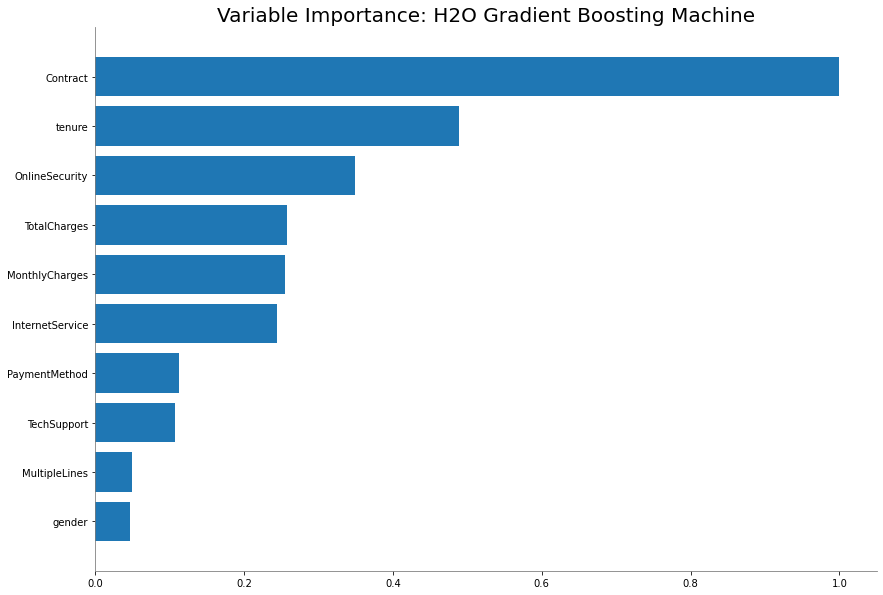

<Figure size 432x288 with 0 Axes>

In [39]:
out_gbm.varimp_plot()

In [46]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32766151959154843: 


,,No,Yes,Error,Rate
0,No,2884.0,736.0,0.2033,(736.0/3620.0)
1,Yes,344.0,964.0,0.263,(344.0/1308.0)
2,Total,3228.0,1700.0,0.2192,(1080.0/4928.0)


In [47]:
out_xgboost.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.361367556181821: 


,,No,Yes,Error,Rate
0,No,3119.0,501.0,0.1384,(501.0/3620.0)
1,Yes,245.0,1063.0,0.1873,(245.0/1308.0)
2,Total,3364.0,1564.0,0.1514,(746.0/4928.0)


In [40]:
aml.leader.download_mojo(path = "./")

'/content/GLM_1_AutoML_1_20220422_224653.zip'